KDD PROCESS - Kaggle data set https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset


# Step 1: Selection
In this phase, we select the dataset and the relevant features for analysis. For this example, we will use the **Mobile Device Usage and User Behavior Dataset**.

The relevant features we are interested in are:
- `App Usage Time (min/day)`
- `Screen On Time (hours/day)`
- `Battery Drain (mAh/day)`
- `Data Usage (MB/day)`
- `User Behavior Class`


In [2]:
import pandas as pd

# Load the dataset for mobile device usage and user behavior
file_path = 'user_behavior_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:

# Select relevant columns for analysis
selected_data = data[['App Usage Time (min/day)', 'Screen On Time (hours/day)',
                      'Battery Drain (mAh/day)', 'Data Usage (MB/day)',
                      'User Behavior Class']]
selected_data.head()


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Data Usage (MB/day),User Behavior Class
0,393,6.4,1872,1122,4
1,268,4.7,1331,944,3
2,154,4.0,761,322,2
3,239,4.8,1676,871,3
4,187,4.3,1367,988,3



# Step 2: Preprocessing
In this phase, we handle missing values, inconsistent data, and normalize the data if necessary. We will first check for missing values and basic data inconsistencies.


In [4]:

# Check for missing values
missing_values = selected_data.isnull().sum()
missing_values

# Check for any outliers and inconsistent data
selected_data.describe()


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Data Usage (MB/day),User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,929.742857,2.990000
std,177.199484,3.068584,819.136414,640.451729,1.401476
min,30.000000,1.000000,302.000000,102.000000,1.000000
25%,113.250000,2.500000,722.250000,373.000000,2.000000
50%,227.500000,4.900000,1502.500000,823.500000,3.000000
75%,434.250000,7.400000,2229.500000,1341.000000,4.000000
max,598.000000,12.000000,2993.000000,2497.000000,5.000000



# Step 3: Transformation
This phase involves transforming the data to make it suitable for modeling. We will scale the numerical features for better model performance.


In [5]:

from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data.drop(columns='User Behavior Class'))
scaled_data = pd.DataFrame(scaled_data, columns=selected_data.columns[:-1])

# Add back the target column
scaled_data['User Behavior Class'] = selected_data['User Behavior Class'].values
scaled_data.head()


,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Data Usage (MB/day),User Behavior Class
0,0.688256,0.367626,0.423726,0.300405,4
1,-0.017668,-0.186771,-0.237198,0.022277,3
2,-0.661471,-0.415053,-0.933550,-0.949607,2
3,-0.181443,-0.154160,0.184279,-0.091787,3
4,-0.475107,-0.317218,-0.193218,0.091028,3



# Step 4: Data Mining
We will apply clustering techniques to identify different user behavior patterns. KMeans clustering will be used to identify clusters based on usage patterns.


In [6]:

from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=0)
scaled_data['Cluster'] = kmeans.fit_predict(scaled_data.drop(columns='User Behavior Class'))

# Display the clusters
scaled_data[['User Behavior Class', 'Cluster']].head()


,User Behavior Class,Cluster
0,4,1
1,3,2
2,2,0
3,3,2
4,3,2


from matplotlib import pyplot as plt
_df_0['User Behavior Class'].plot(kind='hist', bins=20, title='User Behavior Class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='User Behavior Class', y='Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['User Behavior Class'].plot(kind='line', figsize=(8, 4), title='User Behavior Class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)


# Step 5: Interpretation and Evaluation
We will evaluate the clusters and check how they align with the original `User Behavior Class`. The clustering results will be visualized.


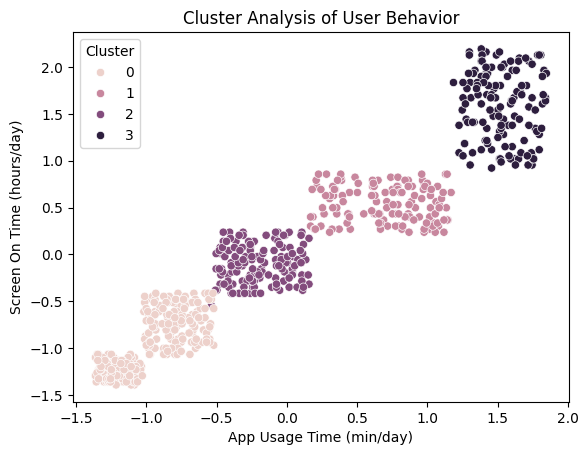

Cluster,0,1,2,3
User Behavior Class,,,,
1,136,0,0,0
2,145,0,1,0
3,0,0,143,0
4,0,139,0,0
5,0,0,0,136


In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
sns.scatterplot(x='App Usage Time (min/day)', y='Screen On Time (hours/day)', hue='Cluster', data=scaled_data)
plt.title('Cluster Analysis of User Behavior')
plt.show()

# Evaluate the clustering alignment with User Behavior Class
alignment = pd.crosstab(scaled_data['User Behavior Class'], scaled_data['Cluster'])
alignment
